In [1]:
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
from lsst.sims.featureScheduler.modelObservatory import Kinem_model
from lsst.sims.utils import _hpid2RaDec
from astropy.coordinates import SkyCoord, EarthLocation
from astropy import coordinates as coordinates
from astropy import units as u

In [2]:
km = Kinem_model()
mjd = 56320
_temp = km.slew_times([0], [np.radians(-10)], mjd = 56320, update=True, rotTelPos=0.)
_temp

array([90.35300681])

In [3]:
km.slew_times([0], [np.radians(-10)], mjd = 56320.001, update=True, rotTelPos=0.)

array([2.])

In [4]:
km.slew_times([0], [np.radians(-40)], mjd = 56320.002, update=True, rotTelPos=0.)

array([60.22762534])

In [5]:
np.degrees(km.current_coords), km.parked

(array([[  0.],
        [-40.]]), False)

In [6]:
nside = 128
hpid = np.arange(hp.nside2npix(nside))
ra, dec = _hpid2RaDec(nside, hpid)

In [7]:
mjd = 56320
st = km.slew_times(ra, dec, mjd)

/Users/yoachim/lsst/stack/miniconda3-4.5.12-1172c30/DarwinX86/healpy/1.10.3.lsst2+3/lib/python/healpy-1.10.3-py3.7-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsst/stack/miniconda3-4.5.12-1172c30/DarwinX86/healpy/1.10.3.lsst2+3/lib/python/healpy-1.10.3-py3.7-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsst/stack/miniconda3-4.5.12-1172c30/DarwinX86/healpy/1.10.3.lsst2+3/lib/python/healpy-1.10.3-py3.7-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


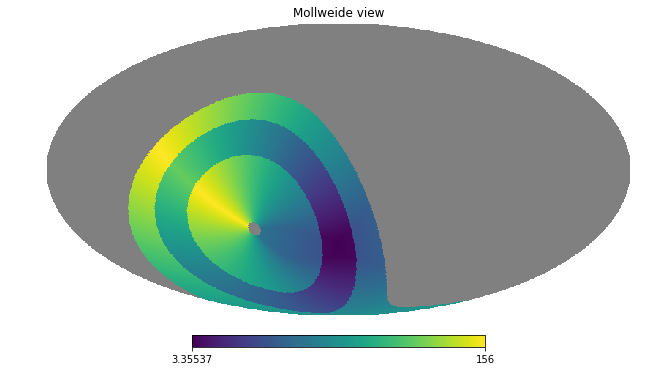

In [8]:
hp.mollview(st)

In [9]:
TwoPi = 2.*np.pi
def smallest_signed_angle(a1, a2):
    """Assume angles between 0 and 2 pi
    via https://stackoverflow.com/questions/1878907/the-smallest-difference-between-2-angles"""
    a = (a1 - a2) % TwoPi
    b = (a2 - a1) % TwoPi
    return -a if a < b else b


In [10]:
np.degrees(smallest_signed_angle(np.radians(350), np.radians(10)))

19.99999999999998

In [11]:
def _getRotSkyPos(paRad, rotTelRad):
    """
    Paramteres
    ----------
    paRad : float or array
        The parallactic angle
    """
    return (rotTelRad - paRad) #% (2. * np.pi)


def _getRotTelPos(paRad, rotSkyRad):
    """
    """
    return (rotSkyRad + paRad) #% (2. * np.pi)

In [12]:
-90 % 360

270